# Rychlost pohybu nespojitosti

Uvažujme rovnici
$$
u_t + f(u)_x = 0
$$

s nespojitým (slabým) řešením ve tvaru
$$
    u(x,t) = \left\{ 
        \begin{array}{ll}
            u_l & \text{pro\ } x < \xi(t), \\
            u_r & \text{pro\ } x \ge \xi(t),
        \end{array}
        \right.
$$
kde funkce $\xi(t)$ udává polohu nespojitosti v čase $t$. Potom pro rychlost pohybu nespojitosti $s = \dot{\xi}(t)$ platí
$$
    s = \frac{f(u_r)-f(u_l)}{u_r-u_l}.
$$

## Příklad: Burgersova rovnice s nespojitou počáteční podmínkou

Rovnice: $u_t + (\frac{1}{2} u^2)_x = 0$, počáteční podmínka $u_0(x) = x$ pro $x\in [0,0.25]$ a $u_0(x)=0$ jinde.

In [44]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

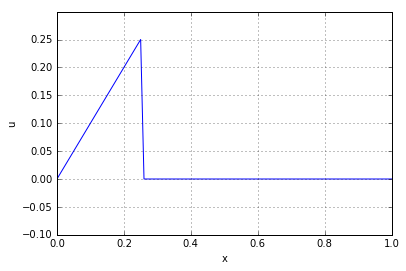

In [6]:
Nx = 101;                   # Pocet bodu site na intervalu [0,1]

x = linspace(0,1,Nx);       # Souradnice bodu site


def u0(x):
        """Definice pocatecni podminky"""
        if x<=0.25:
            return x
        else:
            return 0

            
plt.plot(x,[u0(xi) for xi in x]);
plt.ylim(-0.1,0.3); plt.grid(True); plt.xlabel("x"); plt.ylabel("u");

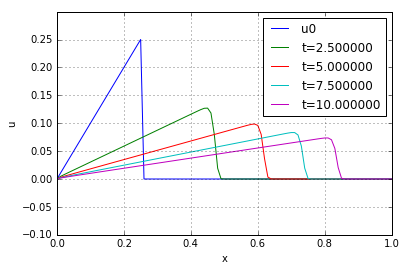

In [24]:
dx = 1.0 / (Nx-1);      # Velikost prostoroveho 
dt = 0.5 * dx / 1.0  # Velikost casoveho kroku

Tend = 10;

pocet_iteraci = int(Tend / dt) # Vypocet provedeme do casu priblizne Tend

t = zeros( pocet_iteraci )
u = zeros( (Nx, pocet_iteraci) )
u[:,0] = array([u0(xi) for xi in x])


def flux_upwind(ul, ur):
    if (ul+ur>0): return ul**2/2
    elif (ul+ur<0): return ur**2/2
    else: return 0;
    
for n in range(pocet_iteraci-1):     

    for i in range(1,Nx-1):
        u[i,n+1] = u[i,n] - dt / dx * ( flux_upwind(u[i,n],u[i+1,n]) - flux_upwind(u[i-1,n],u[i,n]) )
    
    t[n+1] = t[n] + dt

plt.plot(x, [u0(xi) for xi in x], label="u0")
plt.plot(x,u[:,(pocet_iteraci-1) // 4], "-", label="t=%f"%(Tend/4));
plt.plot(x,u[:,(pocet_iteraci-1) * 2 //4 ], "-", label="t=%f"%(Tend/2));
plt.plot(x,u[:,(pocet_iteraci-1) * 3 //4 ], "-", label="t=%f"%(Tend*3/4));
plt.plot(x,u[:,pocet_iteraci-1], "-", label="t=%f"%Tend);
plt.ylim(-0.1,0.3); plt.grid(True); plt.xlabel("x"); plt.ylabel("u"); plt.legend(loc="upper right");


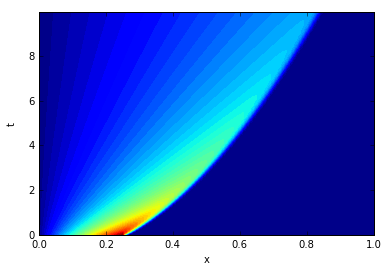

In [36]:
X,T = meshgrid(x,t)
plt.contourf(X, T, transpose(u), 50);
plt.xlabel("x"); plt.ylabel("t");

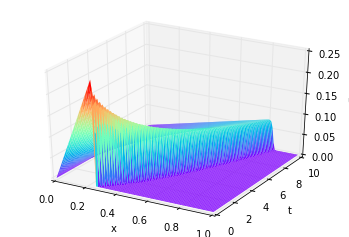

In [57]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, T, transpose(u), rstride=20, cstride=1, linewidth=0, cmap=cm.rainbow);
ax.set_xlabel("x"); ax.set_ylabel("t"); ax.set_zlabel("u");

# Entropická podmínka

Nechť $z \in \mathbb C^2(\mathbb R \to \mathbb R)$ je konvexní ($z''(u) \ge 0$) a $g'(u) = z'(u) f'(u)$. Potom
pro hladké řešení rovnice
$$
    u_t + f(u)_x = 0
$$ 
platí
$$
    z(u)_t + g(u)_x = 0.
$$

Pokud je (slabé) řešení nespojité, tak nemusí být jednoznačné. Jednoznačné řešení lze pak získat jako
$$
    u(x,t) = \lim_{\epsilon\to 0+} u^\epsilon(x,t),
$$
kde $u^\epsilon$ je řešením rovnice
$$
    u^\epsilon_t + f(u^\epsilon)_x = \epsilon u^\epsilon_{xx}.
$$ 

Pro takto získané řešení platí (ve slabém smyslu)
$$
    z(u)_t + g(u)_x \le 0.
$$

## Příklad: nespojitost vyhovující entropické podmínce

Uvažujme Burgersovu rovnici $u_t + (\frac{1}{2}u^2)_x=0$ se slabým řešením $u(x,t) = 1$ pro $x<0$ a $-1$ pro $x \ge 0$.
Zvolme $z(u) = u^2/2$. Poznámka: správně bychom měli entropickou podmínku ověřovat pro všechny konvexni funkce $z$, to lze nahradit vyšetřením pro speciální entropie $z^p(u) = max(u-p,0)$, kde $p\in\mathbb R$. My se však pro demonstraci omezíme na výše uvedenou entropii. Pro tuto entropii je
$$
    g'(u) = z'(u) f'(u) = u u = u^2
$$
a tedy
$$
    g(u) = \frac{1}{3} u^3.
$$

Integrujeme-li entropickou nerovnost na intervalech $x \in [-1,1]$ a $t \in [0,1]$, dostáváme
$$
    \int_0^1 \int_{-1}^1 (z(u)_t + g(u)_x)\,dx\,dt = \int_{-1}^1 [z(u(x,t))]_{t=0}^1 \,dx +
    \int_{0}^1 [g(u(x,t))]_{x=-1}^1 \,dt = (*)
$$
Vzhledem k tomu, že řešení je po částech konstantní, zjednoduší se nám výše uvedený integrál na
$$
    (*) = 2 (\frac{1}{2}-\frac{1}{2}) + 1 \frac{1}{3}( (-1)^3 - 1^3 ) = - \frac{2}{3} \le 0.
$$


## Příklad: nespojitost nevyhovující entropické podmínce

Uvažujme Burgersovu rovnici $u_t + (\frac{1}{2}u^2)_x=0$ se slabým řešením $u(x,t) = -1$ pro $x<0$ a $1$ pro $x \ge 0$. Postupujeme stejně jako v předchozím příkladě se $z(u) = u^2/2$. 

Integrujeme-li entropickou nerovnost na intervalech $x \in [-1,1]$ a $t \in [0,1]$, dostáváme
$$
    \int_0^1 \int_{-1}^1 (z(u)_t + g(u)_x)\,dx\,dt = \int_{-1}^1 [z(u(x,t))]_{t=0}^1 \,dx +
    \int_{0}^1 [g(u(x,t))]_{x=-1}^1 \,dt = (*)
$$
Tentokrát je však
$$
    (*) = 2 (\frac{1}{2}-\frac{1}{2}) + 1 \frac{1}{3}( 1^3 - (-1)^3 ) = \frac{2}{3} > 0.
$$


## Numerické řešení nevyhovující entropické podmínce

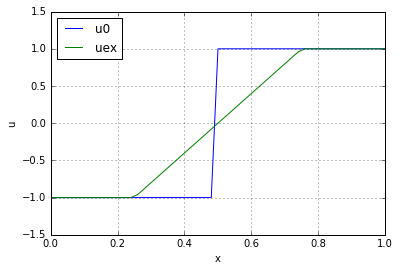

In [130]:
Nx = 51;                   # Pocet bodu site na intervalu [0,1]

x = linspace(0,1,Nx);       # Souradnice bodu site


def u0(x):
        """Definice pocatecni podminky"""
        if x<0.5:
            return -1.0
        else:
            return 1.0

def uex(x,t):
        """Presne reseni"""
        if (abs(x-0.5)<t):
            return (x-0.5)/t
        elif(x<0.5):
            return -1.0
        else:
            return 1.0
            
plt.plot(x,[u0(xi) for xi in x], label="u0");
plt.plot(x,[uex(xi, 0.25) for xi in x], label="uex");
plt.legend(loc="upper left");
plt.ylim(-1.5,1.5); plt.grid(True); plt.xlabel("x"); plt.ylabel("u");

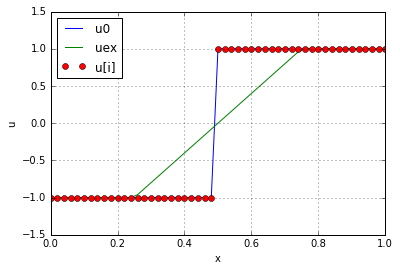

In [134]:
dx = 1.0 / (Nx-1);      # Velikost prostoroveho 
dt = 0.5 * dx / 1.0  # Velikost casoveho kroku

u    = array([u0(xi) for xi in x])
uNew = copy(u)

t = 0
Tend = 0.25;

pocet_iteraci = int(Tend / dt) # Vypocet provedeme do casu priblizne Tend

def f(u):
    return u**2 / 2.

def flux_upwind_1(ul, ur):
    if (ul+ur>0): return f(ul)
    elif (ul+ur<=0): return f(ur)
    
for n in range(pocet_iteraci):     

    for i in range(1,Nx-1):
        uNew[i] = u[i] - dt / dx * ( flux_upwind_1(u[i],u[i+1]) - flux_upwind_1(u[i-1],u[i]) )
    
    t = t + dt
    u = copy(uNew)

u_upwind = copy(u)

plt.plot(x, [u0(xi) for xi in x], label="u0")
plt.plot(x,[uex(xi, 0.25) for xi in x], label="uex");
plt.plot(x,u, "o", label="u[i]");
plt.ylim(-1.5,1.5); plt.grid(True); plt.xlabel("x"); plt.ylabel("u"); plt.legend(loc="upper left");


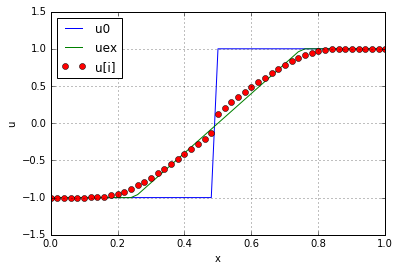

In [135]:
u    = array([u0(xi) for xi in x])
uNew = copy(u)

def flux_upwind_2(ul, ur):
    if (ul+ur>0): return f(ul)
    elif (ul+ur<0): return f(ur)
    else: return 0

for n in range(pocet_iteraci):     

    for i in range(1,Nx-1):
        uNew[i] = u[i] - dt / dx * ( flux_upwind_2(u[i],u[i+1]) - flux_upwind_2(u[i-1],u[i]) )
    
    t = t + dt
    u = copy(uNew)

plt.plot(x, [u0(xi) for xi in x], label="u0")
plt.plot(x,[uex(xi, 0.25) for xi in x], label="uex");
plt.plot(x,u, "o", label="u[i]");
plt.ylim(-1.5,1.5); plt.grid(True); plt.xlabel("x"); plt.ylabel("u"); plt.legend(loc="upper left");


## Entropická korekce toku upwind


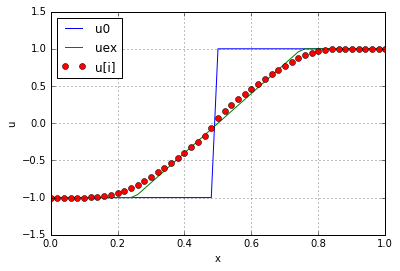

In [174]:
u    = array([u0(xi) for xi in x])
uNew = copy(u)

def myabs(s):
    eps = 0.2
    a = abs(s)
    if (a>eps):
        return a
    else:
        return (a**2+eps**2)/(2*eps)
    
def flux_upwind_e(ul, ur):
    if (ul>ur): 
        return flux_upwind_1(ul,ur)
    else:
        s = (ul+ur) / 2.0
        flux = f((ul+ur)/2.)  -  myabs(s)/2. * (ur-ul)
        return flux
        
for n in range(pocet_iteraci):     

    for i in range(1,Nx-1):
        uNew[i] = u[i] - dt / dx * ( flux_upwind_e(u[i],u[i+1]) - flux_upwind_e(u[i-1],u[i]) )
    
    t = t + dt
    u = copy(uNew)

plt.plot(x, [u0(xi) for xi in x], label="u0")
plt.plot(x,[uex(xi, 0.25) for xi in x], label="uex");
plt.plot(x,u, "o", label="u[i]");
plt.ylim(-1.5,1.5); plt.grid(True); plt.xlabel("x"); plt.ylabel("u"); plt.legend(loc="upper left");
